In [1]:
from sklearn.crossvalidation import train_test_split

ModuleNotFoundError: No module named 'sklearn.crossvalidation'

In [2]:
install sklearn_selecton import train_test_split

SyntaxError: invalid syntax (<ipython-input-2-50025af6b22e>, line 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_breast_cancer      #load th dataset in dataframe..
df1 = load_breast_cancer()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df1
df1.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(df1['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
print(df1['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
df2 = df1['feature_names']

In [7]:
x = pd.DataFrame(data=df1['data'],columns=df1['feature_names'])

In [8]:
x.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y=df1["target"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)




In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[60  3]
 [13 95]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

             precision    recall  f1-score   support

          0       0.82      0.95      0.88        63
          1       0.97      0.88      0.92       108

avg / total       0.92      0.91      0.91       171



In [14]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
score = metrics.accuracy_score(y_test,predictions)
score

0.9064327485380117

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

new_score=[]
for i in range(2,30):
    bdt = AdaBoostClassifier(base_estimator= clf,
                         n_estimators=i)
    bdt.fit(X_train,y_train)
    y_pred = bdt.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    new_score.append(score)
print(new_score)


    

[0.9181286549707602, 0.9122807017543859, 0.9064327485380117, 0.9181286549707602, 0.9239766081871345, 0.9064327485380117, 0.9415204678362573, 0.9122807017543859, 0.9298245614035088, 0.9239766081871345, 0.9239766081871345, 0.9064327485380117, 0.9122807017543859, 0.9239766081871345, 0.9298245614035088, 0.9239766081871345, 0.9298245614035088, 0.9239766081871345, 0.9181286549707602, 0.935672514619883, 0.9122807017543859, 0.9122807017543859, 0.935672514619883, 0.9239766081871345, 0.9122807017543859, 0.9122807017543859, 0.9239766081871345, 0.9122807017543859]


In [16]:
estimator = list(range(2,32))

In [17]:
estimator

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

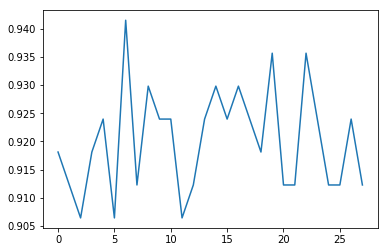

In [20]:
import matplotlib.pyplot as plt

plt.plot(new_score)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

new_score=[]
for i in range(2,50):
    bdt = AdaBoostClassifier(base_estimator= clf,
                         n_estimators=i)
    bdt.fit(X_train,y_train)
    y_pred = bdt.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    new_score.append(score)
print(new_score)